This notebook contains my Python project for the first project

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [7]:
from bs4 import BeautifulSoup
import requests

my_html = 'https://www.the-numbers.com/market/2014/top-grossing-movies'

page = requests.get(my_html)

#soup = BeautifulSoup(my_html, 'html.parser')

page.text

'<HTML>\n<HEAD>\n<TITLE>403 Forbidden</TITLE>\n</HEAD>\n<BODY>\n<H1>Forbidden</H1>\nYou do not have permission to access this document.\n<P>\n<HR>\n<ADDRESS>\nWeb Server at the-numbers.com\n</ADDRESS>\n</BODY>\n</HTML>\n\n<!--\n   - Unfortunately, Microsoft has added a clever new\n   - "feature" to Internet Explorer. If the text of\n   - an error\'s message is "too small", specifically\n   - less than 512 bytes, Internet Explorer returns\n   - its own error message. You can turn that off,\n   - but it\'s pretty tricky to find switch called\n   - "smart error messages". That means, of course,\n   - that short error messages are censored by default.\n   - IIS always returns error messages that are long\n   - enough to make Internet Explorer happy. The\n   - workaround is pretty simple: pad the error\n   - message with a big comment like this to push it\n   - over the five hundred and twelve bytes minimum.\n   - Of course, that\'s exactly what you\'re reading\n   - right now.\n   -->\n'

Scrape the data from the-numbers.com and save each year to a text file.

In [8]:
from urllib.request import Request, urlopen

req = Request(
    url='https://www.the-numbers.com/market/2014/top-grossing-movies', 
    headers={'User-Agent': 'Mozilla/5.0'}
)
webpage = urlopen(req).read()

In [16]:
webtext = webpage.decode("utf-8")

In [17]:
f = open("movies2014.txt","w+")
f.write(webtext)

310021

In [27]:
stringlist = []
for i in range(0,22):
    if i <= 9:
        num = '0'+str(i)
    else:
        num = str(i)
    stringlist.append(num)
    
stringlist

my_html = 'https://www.the-numbers.com/market/2014/top-grossing-movies'
cnt = 0
for j in stringlist:

    print(cnt)
    my_url = 'https://www.the-numbers.com/market/20' + j + '/top-grossing-movies'
    req = Request(
        url=my_url, 
        headers={'User-Agent': 'Mozilla/5.0'}
    )
    webpage = urlopen(req).read()
    webtext = webpage.decode("utf-8")
    file_name = 'movies_' + str(cnt) + '.txt'
    print(file_name)
    f = open(file_name,"w+")
    f.write(webtext)
    cnt += 1
    print("YES")

0
movies_0.txt
YES
1
movies_1.txt
YES
2
movies_2.txt
YES
3
movies_3.txt
YES
4
movies_4.txt
YES
5
movies_5.txt
YES
6
movies_6.txt
YES
7
movies_7.txt
YES
8
movies_8.txt
YES
9
movies_9.txt
YES
10
movies_10.txt
YES
11
movies_11.txt
YES
12
movies_12.txt
YES
13
movies_13.txt
YES
14
movies_14.txt
YES
15
movies_15.txt
YES
16
movies_16.txt
YES
17
movies_17.txt
YES
18
movies_18.txt
YES
19
movies_19.txt
YES
20
movies_20.txt
YES
21
movies_21.txt
YES


In [22]:
stringlist = []
for i in range(0,22):
    if i <= 9:
        num = '0'+str(i)
    else:
        num = str(i)
    stringlist.append(num)
    
stringlist



['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21']

Example of one raw scraped text file.

In [30]:
with open('movies_15.txt') as f:
    lines = f.readlines()

['<!DOCTYPE html>\n',
 '<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">\n',
 '<head>\n',
 '<link rel="icon" href="/images/logo_2021/favicon.ico">\n',
 '<meta name="robots" content="nofollow, NOARCHIVE, NOODP, NOYDIR">\n',
 '<!-- Global site tag (gtag.js) - Google Analytics -->\n',
 '<script async src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>\n',
 '<script>\n',
 '  window.dataLayer = window.dataLayer || [];\n',
 '  function gtag(){dataLayer.push(arguments);}\n',
 "  gtag('js', new Date());\n",
 '\n',
 "  gtag('config', 'UA-1343128-1');\n",
 '</script>\n',
 '<meta http-equiv="PICS-Label" content=\'(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))\'>\n',
 '<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->\n',
 '<meta http-

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(open("movies_11.txt").read())

In [5]:
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<link href="/images/logo_2021/favicon.ico" rel="icon"/>
<meta content="nofollow, NOARCHIVE, NOODP, NOYDIR" name="robots"/>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
</script>
<meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
<!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="telephone=no" name="f

Import pandas and get the data frame.

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

table = soup.find_all('table')
df = pd.read_html(str(table))[0]
df

NameError: name 'soup' is not defined

In [36]:
df2 = df.head(100)
df2

,Rank,Movie,ReleaseDate,Distributor,Genre,2015 Gross,Tickets Sold
0,1,Star Wars Ep. VII: The Forc…,"Dec 18, 2015",Walt Disney,Adventure,"$742,208,942",88043765.0
1,2,Jurassic World,"Jun 12, 2015",Universal,Action,"$652,270,625",77374926.0
2,3,Avengers: Age of Ultron,"May 1, 2015",Walt Disney,Action,"$459,005,868",54449094.0
3,4,Inside Out,"Jun 19, 2015",Walt Disney,Adventure,"$356,461,711",42284900.0
4,5,Furious 7,"Apr 3, 2015",Universal,Action,"$353,007,020",41875091.0
...,...,...,...,...,...,...,...
95,96,The Lazarus Effect,"Feb 27, 2015",Lionsgate,Horror,"$25,801,570",3060684.0
96,97,Ex Machina,"Apr 10, 2015",A24,Thriller/Suspense,"$25,440,971",3017908.0
97,98,In the Heart of the Sea,"Dec 11, 2015",Warner Bros.,Adventure,"$23,063,385",2735870.0
98,99,The Gallows,"Jul 10, 2015",Warner Bros.,Horror,"$22,764,410",2700404.0


In [37]:
df2['Tickets Sold'].sum()

1202129698.0

In [44]:
df2.groupby('Distributor').count().sort_values(['Genre'],ascending=False).head(15)

,Rank,Movie,ReleaseDate,Genre,2015 Gross,Tickets Sold
Distributor,,,,,,
Warner Bros.,20,20,20,20,20,20
Universal,16,16,16,16,16,16
20th Century Fox,15,15,15,15,15,15
Sony Pictures,12,12,12,12,12,12
Walt Disney,10,10,10,10,10,10
Lionsgate,6,6,6,6,6,6
Paramount Pictures,6,6,6,6,6,6
Weinstein Co.,6,6,6,6,6,6
CBS Films,2,2,2,2,2,2


In [2]:
# Get a list of names of txt files
file_list = []
for i in range(0,22):
    item = "movies_" + str(i) + ".txt"
    file_list.append(item)
file_list

['movies_0.txt',
 'movies_1.txt',
 'movies_2.txt',
 'movies_3.txt',
 'movies_4.txt',
 'movies_5.txt',
 'movies_6.txt',
 'movies_7.txt',
 'movies_8.txt',
 'movies_9.txt',
 'movies_10.txt',
 'movies_11.txt',
 'movies_12.txt',
 'movies_13.txt',
 'movies_14.txt',
 'movies_15.txt',
 'movies_16.txt',
 'movies_17.txt',
 'movies_18.txt',
 'movies_19.txt',
 'movies_20.txt',
 'movies_21.txt']

In [3]:
# Load each txt file into a dataframe and create a dictionary of dataframes.
alldata = {}
for item in file_list:
    soup = BeautifulSoup(open(item).read())
    table = soup.find_all('table')
    df = pd.read_html(str(table))[0]
    #df
    alldata[item] = df

In [4]:
local14 = alldata['movies_14.txt']
local15 = alldata['movies_15.txt']



In [5]:
local14

,Rank,Movie,ReleaseDate,Distributor,Genre,2014 Gross,Tickets Sold
0,1,Guardians of the Galaxy,"Aug 1, 2014",Walt Disney,Action,"$333,055,258",4.076564e+07
1,2,The Hunger Games: Mockingja…,"Nov 21, 2014",Lionsgate,Thriller/Suspense,"$323,734,502",3.962479e+07
2,3,Captain America: The Winter…,"Apr 4, 2014",Walt Disney,Action,"$259,746,958",3.179277e+07
3,4,The Lego Movie,"Feb 7, 2014",Warner Bros.,Adventure,"$257,784,718",3.155260e+07
4,5,Transformers: Age of Extinc…,"Jun 27, 2014",Paramount Pictures,Action,"$245,439,076",3.004150e+07
...,...,...,...,...,...,...,...
757,758,Grand départ,"May 23, 2014",Rialto Pictures,Drama,$459,5.600000e+01
758,759,Barbecue,"Dec 26, 2014",Distrib Films,Comedy,$388,4.700000e+01
759,760,Computer Chess,"Jul 17, 2013",Kino Lorber,Comedy,$323,3.900000e+01
760,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,"$10,271,492,042",NaN


In [12]:
sum14 = local14.groupby(['Genre']).sum()
sum15 = local15.groupby(['Genre']).sum()



In [13]:
sum14

,Tickets Sold
Genre,
Action,3.251622e+08
Adventure,3.410381e+08
Black Comedy,2.871242e+07
Comedy,1.528231e+08
Concert/Perfor…,3.853260e+05
Documentary,1.077636e+07
Drama,1.924421e+08
Horror,3.379565e+07
Multiple Genres,6.286630e+05


In [16]:
result = pd.concat([sum14,sum15],axis=1)
result.groupby(result.columns,axis=1).sum()

,Tickets Sold
Genre,
Action,6.854842e+08
Adventure,7.086991e+08
Black Comedy,3.282819e+07
Comedy,2.994078e+08
Concert/Perfor…,5.217430e+05
Documentary,1.850096e+07
Drama,4.380166e+08
Horror,9.085335e+07
Multiple Genres,9.148420e+05


In [67]:
left = alldata['movies_0.txt'].groupby(['Genre']).sum()
left

,Tickets Sold
Genre,
Action,2.252358e+08
Adventure,2.666943e+08
Black Comedy,9.766136e+06
Comedy,2.751109e+08
Concert/Perfor…,7.207367e+06
Documentary,2.356539e+07
Drama,2.933844e+08
Horror,7.722755e+07
Musical,1.732434e+07


In [7]:
file_list_sub = file_list[1:]
file_list_sub

['movies_1.txt',
 'movies_2.txt',
 'movies_3.txt',
 'movies_4.txt',
 'movies_5.txt',
 'movies_6.txt',
 'movies_7.txt',
 'movies_8.txt',
 'movies_9.txt',
 'movies_10.txt',
 'movies_11.txt',
 'movies_12.txt',
 'movies_13.txt',
 'movies_14.txt',
 'movies_15.txt',
 'movies_16.txt',
 'movies_17.txt',
 'movies_18.txt',
 'movies_19.txt',
 'movies_20.txt',
 'movies_21.txt']

Join all the dataframes and sum tickets sold.

In [68]:
for i in file_list_sub:
    right = alldata[i].groupby(['Genre']).sum()
    result = pd.concat([left,right],axis=1)
    left = result.groupby(result.columns,axis=1).sum()

In [69]:
left

,Tickets Sold
Genre,
Action,5.811114e+09
Adventure,7.916227e+09
Black Comedy,2.356155e+08
Comedy,4.004979e+09
Concert/Perfor…,5.564112e+07
Documentary,3.177126e+08
Drama,3.913450e+09
Horror,1.572135e+09
Musical,5.167625e+08


In [70]:
#left.plot(kind='pie',y='Tickets Sold')
left = left.drop(['Total Gross of All Movies','Total Tickets Sold'])
left

,Tickets Sold
Genre,
Action,5.811114e+09
Adventure,7.916227e+09
Black Comedy,2.356155e+08
Comedy,4.004979e+09
Concert/Perfor…,5.564112e+07
Documentary,3.177126e+08
Drama,3.913450e+09
Horror,1.572135e+09
Musical,5.167625e+08


In [71]:
new_left = left.sort_values(by=['Tickets Sold'],ascending=True)
new_left

,Tickets Sold
Genre,
Educational,2.800000e+01
Reality,7.381000e+04
Multiple Genres,8.044266e+06
Concert/Perfor…,5.564112e+07
Western,1.578724e+08
Black Comedy,2.356155e+08
Documentary,3.177126e+08
Musical,5.167625e+08
Romantic Comedy,1.205131e+09


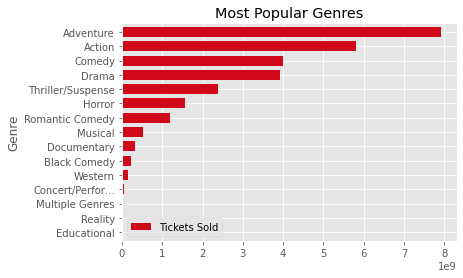

In [73]:
new_left.plot.barh(color='#d10819',width=0.7,title="Most Popular Genres")
plt.savefig('pythonprjfigs/populargenres2.png', bbox_inches='tight')

In [63]:
new_row = new_left.iloc[[0,1,2,3,4,5,6,7]].sum()
new_left = new_left.drop(['Educational','Reality','Multiple Genres','Concert/Perfor…','Western','Black Comedy','Documentary','Musical'])




In [68]:
new_row = pd.Series(new_row,name='Other')
new_row

Tickets Sold    1.291722e+09
Name: Other, dtype: float64

In [69]:
new_left = new_left.append(new_row)

,Tickets Sold
Genre,
Romantic Comedy,1.205131e+09
Horror,1.572135e+09
Thriller/Suspense,2.392055e+09
Drama,3.913450e+09
Comedy,4.004979e+09
Action,5.811114e+09
Adventure,7.916227e+09
Other,1.291722e+09


<AxesSubplot:title={'center':'Total Tickets Sold'}>

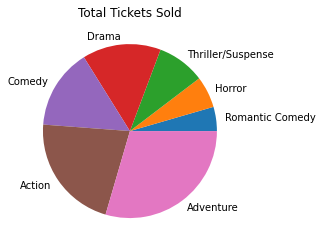

In [70]:
new_left.plot(kind='pie',y='Tickets Sold', legend=False, ylabel='', title='Total Tickets Sold')

In [35]:
import matplotlib.pyplot as plt

mine = alldata['movies_2.txt']

new = mine.groupby(['Genre']).sum()
new

,Tickets Sold
Genre,
Action,2.399811e+08
Adventure,4.945566e+08
Black Comedy,8.221446e+06
Comedy,2.111249e+08
Concert/Perfor…,3.555958e+06
Documentary,2.339196e+07
Drama,2.293393e+08
Horror,5.733147e+07
Multiple Genres,6.744100e+04


<AxesSubplot:ylabel='Tickets Sold'>

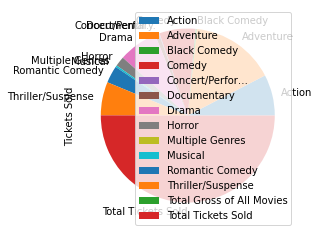

In [36]:
new.plot(kind='pie',y='Tickets Sold')



In [38]:
new2 = new.drop(['Total Gross of All Movies', 'Total Tickets Sold'], axis=0)


<AxesSubplot:ylabel='Tickets Sold'>

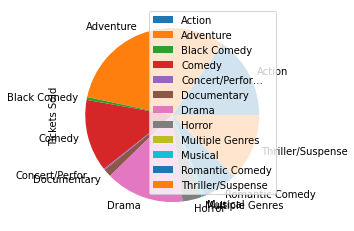

In [39]:
new2.plot(kind='pie',y='Tickets Sold')



In [40]:
mine

,Rank,Movie,ReleaseDate,Distributor,Genre,2002 Gross,Tickets Sold
0,1,Spider-Man,"May 3, 2002",Sony Pictures,Adventure,"$403,706,375",6.948475e+07
1,2,Star Wars Ep. II: Attack of…,"May 16, 2002",20th Century Fox,Adventure,"$310,676,740",5.347276e+07
2,3,The Lord of the Rings: The …,"Dec 18, 2002",New Line,Adventure,"$262,300,833",4.514644e+07
3,4,Harry Potter and the Chambe…,"Nov 15, 2002",Warner Bros.,Adventure,"$252,097,945",4.339035e+07
4,5,My Big Fat Greek Wedding,"Apr 19, 2002",IFC Films,Romantic Comedy,"$227,898,505",3.922522e+07
...,...,...,...,...,...,...,...
600,601,The Jimmy Show,"Dec 13, 2002",NaN,NaN,$703,1.200000e+02
601,602,Besotted,"Nov 1, 2002",Artistic License,Comedy,$656,1.120000e+02
602,603,Hit & Runway,"Mar 2, 2001",NaN,Comedy,$473,8.100000e+01
603,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,"$9,155,147,215",NaN


In [61]:
mine['NewGross'] = mine['2002 Gross'].map(lambda x: x.lstrip('$'))

In [68]:
mine['NewGross'] = mine['NewGross'].replace(',','',regex=True)

In [59]:
mine['NewGross'] = mine['NewGross'].drop(mine.tail(2).index,inplace=True)


In [62]:
mine['NewGross'] = mine['NewGross'][:-2]

In [69]:
mine['NewGross']

0      403706375
1      310676740
2      262300833
3      252097945
4      227898505
         ...    
600          703
601          656
602          473
603          NaN
604          NaN
Name: NewGross, Length: 605, dtype: object

In [70]:
mine4 = mine['NewGross'].dropna()

In [72]:
mine4.astype(int).sum()

9155147215

In [74]:
mine['Month'] = mine['ReleaseDate'].apply(lambda x: x.split(' ')[0])
mine['Month']

0        May
1        May
2        Dec
3        Nov
4        Apr
       ...  
600      Dec
601      Nov
602      Mar
603    Total
604    Total
Name: Month, Length: 605, dtype: object

<AxesSubplot:>

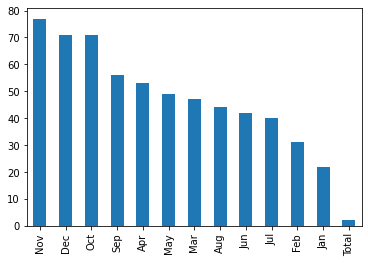

In [77]:
mine['Month'].value_counts().plot(kind="bar")

In [78]:
mine

,Rank,Movie,ReleaseDate,Distributor,Genre,2002 Gross,Tickets Sold,NewGross,Month
0,1,Spider-Man,"May 3, 2002",Sony Pictures,Adventure,"$403,706,375",6.948475e+07,403706375,May
1,2,Star Wars Ep. II: Attack of…,"May 16, 2002",20th Century Fox,Adventure,"$310,676,740",5.347276e+07,310676740,May
2,3,The Lord of the Rings: The …,"Dec 18, 2002",New Line,Adventure,"$262,300,833",4.514644e+07,262300833,Dec
3,4,Harry Potter and the Chambe…,"Nov 15, 2002",Warner Bros.,Adventure,"$252,097,945",4.339035e+07,252097945,Nov
4,5,My Big Fat Greek Wedding,"Apr 19, 2002",IFC Films,Romantic Comedy,"$227,898,505",3.922522e+07,227898505,Apr
...,...,...,...,...,...,...,...,...,...
600,601,The Jimmy Show,"Dec 13, 2002",NaN,NaN,$703,1.200000e+02,703,Dec
601,602,Besotted,"Nov 1, 2002",Artistic License,Comedy,$656,1.120000e+02,656,Nov
602,603,Hit & Runway,"Mar 2, 2001",NaN,Comedy,$473,8.100000e+01,473,Mar
603,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,"$9,155,147,215",NaN,NaN,Total


In [83]:
mine['Tickets Sold'].iloc[0:10].sum()

416200553.0

In [85]:
alldata['movies_11.txt']

,Rank,Movie,ReleaseDate,Distributor,Genre,2011 Gross,Tickets Sold
0,1,Harry Potter and the Deathl…,"Jul 15, 2011",Warner Bros.,Adventure,"$381,011,219",4.804681e+07
1,2,Transformers: Dark of the Moon,"Jun 29, 2011",Paramount Pictures,Action,"$352,390,543",4.443765e+07
2,3,The Twilight Saga: Breaking…,"Nov 18, 2011",Summit Entertainment,Drama,"$275,530,738",3.474536e+07
3,4,The Hangover Part II,"May 26, 2011",Warner Bros.,Comedy,"$254,464,305",3.208882e+07
4,5,Pirates of the Caribbean: O…,"May 20, 2011",Walt Disney,Adventure,"$241,071,802",3.039998e+07
...,...,...,...,...,...,...,...
732,733,Illegal,"Mar 25, 2011",Film Movement,Drama,$651,8.200000e+01
733,734,Rosencrantz and Guildenstei…,"Jun 4, 2010",Indican Pictures,Comedy,$444,5.500000e+01
734,735,Promised Lands,"Dec 31, 1974",The Film Desk,NaN,$397,5.000000e+01
735,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,"$10,173,521,698",NaN


In [84]:
my_totals = []

for j in file_list:
    local = alldata[j]
    to = local['Tickets Sold'].iloc[0:9].sum()
    my_totals.append(to)

In [75]:
years = []

startdate = 2000

for i in range(0,22):
    years.append(startdate)
    startdate+=1
years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [85]:
my_totals

[298119329.0,
 354569925.0,
 389733974.0,
 357777891.0,
 382008521.0,
 328910208.0,
 305253709.0,
 353282385.0,
 327919584.0,
 343869987.0,
 359517855.0,
 285465524.0,
 382820824.0,
 340637977.0,
 284810085.0,
 444416103.0,
 394399103.0,
 366490348.0,
 402665634.0,
 456756382.0,
 114076413.0,
 215360507.0]

In [33]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()
x=np.array(years[0:18]).reshape((-1, 1))
y=np.array(my_totals[0:18])
model.fit(x,y)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 29886390434.6051
slope: [-14192262.14963881]


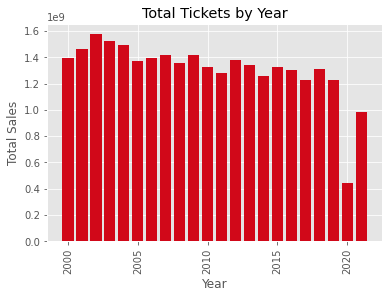

In [83]:
plt.bar(years,my_totals,color='#d10819',width=0.8)
plt.xticks(rotation=90)
plt.title("Total Tickets by Year")
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.savefig('pythonprjfigs/yeartotals.png', bbox_inches='tight')
plt.show()

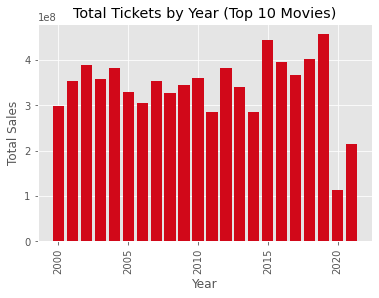

In [87]:


plt.bar(years,my_totals,color='#d10819',width=0.8)
plt.xticks(rotation=90)
plt.title('Total Tickets by Year (Top 10 Movies)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.savefig('pythonprjfigs/yeartotalstop10.png', bbox_inches='tight')
plt.show()

In [53]:
left = alldata['movies_0.txt']

In [57]:
left

,Rank,Movie,ReleaseDate,Distributor,Genre,2000 Gross,Tickets Sold,Month
0,1,How the Grinch Stole Christmas,"Nov 17, 2000",Universal,Adventure,"$253,367,455",4.700695e+07,Nov
1,2,Mission: Impossible 2,"May 24, 2000",Paramount Pictures,Action,"$215,409,889",3.996473e+07,May
2,3,Gladiator,"May 5, 2000",Dreamworks SKG,Action,"$186,610,052",3.462153e+07,May
3,4,The Perfect Storm,"Jun 30, 2000",Warner Bros.,Drama,"$182,618,434",3.388097e+07,Jun
4,5,Meet the Parents,"Oct 6, 2000",Universal,Comedy,"$161,325,490",2.993052e+07,Oct
...,...,...,...,...,...,...,...,...
622,623,Men Cry Bullets,"Oct 8, 1999",Phaedra Cinema,NaN,$516,9.500000e+01,Oct
623,624,Such a Long Journey,"Feb 25, 1999",Shooting Gallery,NaN,$374,6.900000e+01,Feb
624,625,Ground Zero,"May 26, 2000",NaN,NaN,$150,2.700000e+01,May
625,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,Total Gross of All Movies,"$7,532,311,479",NaN,Total


In [56]:
left['Month'] = left['ReleaseDate'].apply(lambda x: x.split(' ')[0])

In [59]:
left = left.groupby(['Month']).sum()

In [60]:
for i in file_list_sub:
    local = alldata[i]
    local['Month'] = local['ReleaseDate'].astype(str).apply(lambda x: x.split(' ')[0])
    right = local.groupby(['Month']).sum()
    result = pd.concat([left,right],axis=1)
    left = result.groupby(result.columns,axis=1).sum()

In [61]:
left

,Tickets Sold
Month,
Apr,1.717217e+09
Aug,1.998878e+09
Dec,3.785949e+09
Feb,1.734956e+09
Jan,1.114719e+09
Jul,2.991439e+09
Jun,3.147650e+09
Mar,2.195872e+09
May,3.045383e+09


In [63]:
left = left.drop('nan')
left = left.drop('Total')
left

,Tickets Sold
Month,
Apr,1.717217e+09
Aug,1.998878e+09
Dec,3.785949e+09
Feb,1.734956e+09
Jan,1.114719e+09
Jul,2.991439e+09
Jun,3.147650e+09
Mar,2.195872e+09
May,3.045383e+09


In [64]:
new_left = left.sort_values(by=['Tickets Sold'],ascending=True)
new_left

,Tickets Sold
Month,
Jan,1.114719e+09
Sep,1.418789e+09
Apr,1.717217e+09
Feb,1.734956e+09
Oct,1.834710e+09
Aug,1.998878e+09
Mar,2.195872e+09
Jul,2.991439e+09
May,3.045383e+09


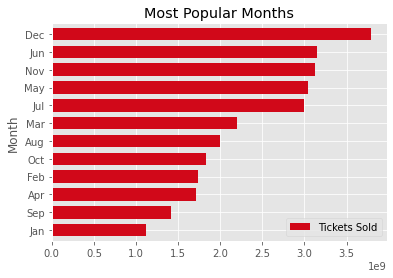

In [66]:
new_left.plot.barh(color='#d10819',width=0.7,title="Most Popular Months")
plt.savefig('pythonprjfigs/popularmonths.png', bbox_inches='tight')


In [88]:
bl

NameError: name 'bl' is not defined

In [89]:
left

,Tickets Sold
Genre,
Action,5.811114e+09
Adventure,7.916227e+09
Black Comedy,2.356155e+08
Comedy,4.004979e+09
Concert/Perfor…,5.564112e+07
Documentary,3.177126e+08
Drama,3.913450e+09
Horror,1.572135e+09
Musical,5.167625e+08


In [91]:
local = alldata['movies_8.txt']
local.head(20)

,Rank,Movie,ReleaseDate,Distributor,Genre,2008 Gross,Tickets Sold,Month
0,1,The Dark Knight,"Jul 18, 2008",Warner Bros.,Action,"$531,001,578",73955652.0,Jul
1,2,Iron Man,"May 2, 2008",Paramount Pictures,Adventure,"$318,412,101",44347089.0,May
2,3,Indiana Jones and the Kingd…,"May 22, 2008",Paramount Pictures,Adventure,"$317,101,119",44164501.0,May
3,4,Hancock,"Jul 1, 2008",Sony Pictures,Action,"$227,946,274",31747391.0,Jul
4,5,WALL-E,"Jun 27, 2008",Walt Disney,Adventure,"$223,806,889",31170876.0,Jun
5,6,Kung Fu Panda,"Jun 6, 2008",Paramount Pictures,Adventure,"$215,434,591",30004818.0,Jun
6,7,Madagascar: Escape 2 Africa,"Nov 7, 2008",Paramount Pictures,Adventure,"$177,016,810",24654152.0,Nov
7,8,Twilight,"Nov 21, 2008",Summit Entertainment,Drama,"$176,922,850",24641065.0,Nov
8,9,Quantum of Solace,"Nov 14, 2008",Sony Pictures,Action,"$166,820,413",23234040.0,Nov
9,10,Horton Hears a Who,"Mar 14, 2008",20th Century Fox,Adventure,"$154,529,439",21522206.0,Mar
